In [31]:
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
# https://www.kaggle.com/datasets/komalnaseer/fuelconsumptioncsv
df = pd.read_csv('./../data/FuelConsumption.csv')

In [18]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
499,2014,HONDA,PILOT,SUV - SMALL,3.5,6,A5,X,13.3,9.3,11.5,25,265
115,2014,BMW,ACTIVEHYBRID 7L,FULL-SIZE,3.0,6,A8,Z,10.5,7.6,9.2,31,212
203,2014,CHEVROLET,CRUZE ECO,MID-SIZE,1.4,4,M6,X,8.4,5.6,7.1,40,163
556,2014,JAGUAR,XJ SUPERCHARGED,FULL-SIZE,5.0,8,AS8,Z,15.8,10.2,13.3,21,306
939,2014,SMART,FORTWO COUPE,TWO-SEATER,1.0,3,AM5,Z,6.9,5.7,6.4,44,147


In [19]:
# drop non numeric columns
df = df.drop(columns=['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'])

In [20]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [21]:
# select feature with high correlation
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


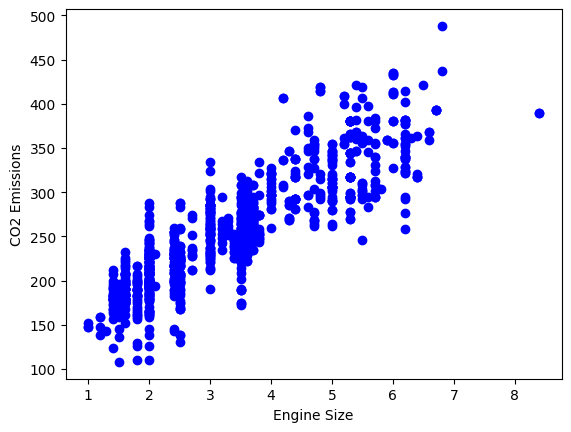

In [22]:
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

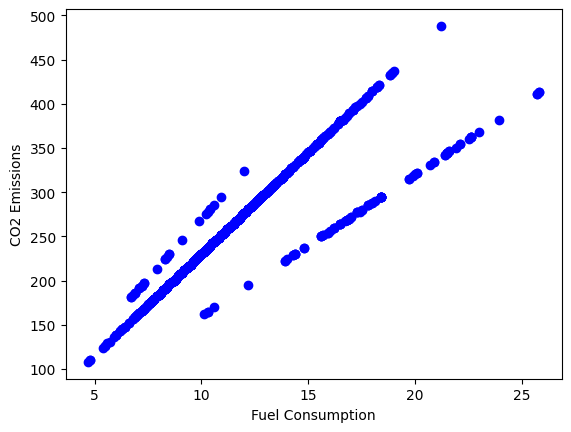

In [23]:
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

In [24]:
# select features
X = df.ENGINESIZE.values
y = df.CO2EMISSIONS.values

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [27]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 126.28970217408761
Coefficient: [38.99297872]


Text(0, 0.5, 'CO2 Emissions')

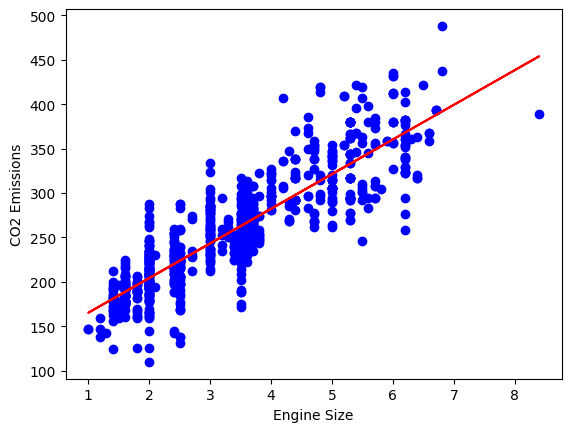

In [28]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.predict(X_train.reshape(-1, 1)), color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

Text(0, 0.5, 'CO2 Emissions')

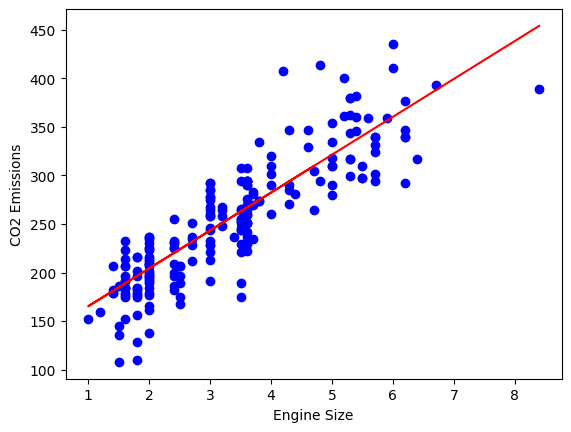

In [29]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.predict(X_test.reshape(-1, 1)), color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test.reshape(-1, 1))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 985.9381692275002
R2 Score: 0.7615595731934371
